# Logistic Regression Demo

In this demo we use a logistic regression model to perform multi-class classification on the 
Iris dataset


In [277]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import sklearn as sk
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics,datasets
from sklearn.model_selection import cross_val_score
%matplotlib inline
# sns.set_context("notebook", font_scale=2.2)
# sns.set_style("ticks")
sns.set(color_codes=True,font_scale=2.2)

### Which features are available in the dataset?

In [278]:
data_set = pd.read_csv('Iris.csv')

for i in data_set.columns.values: 
    print(i)


Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species


In [279]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


#### We can see that we have 4 numerical features (when Id is excluded)

In [280]:
data_set

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


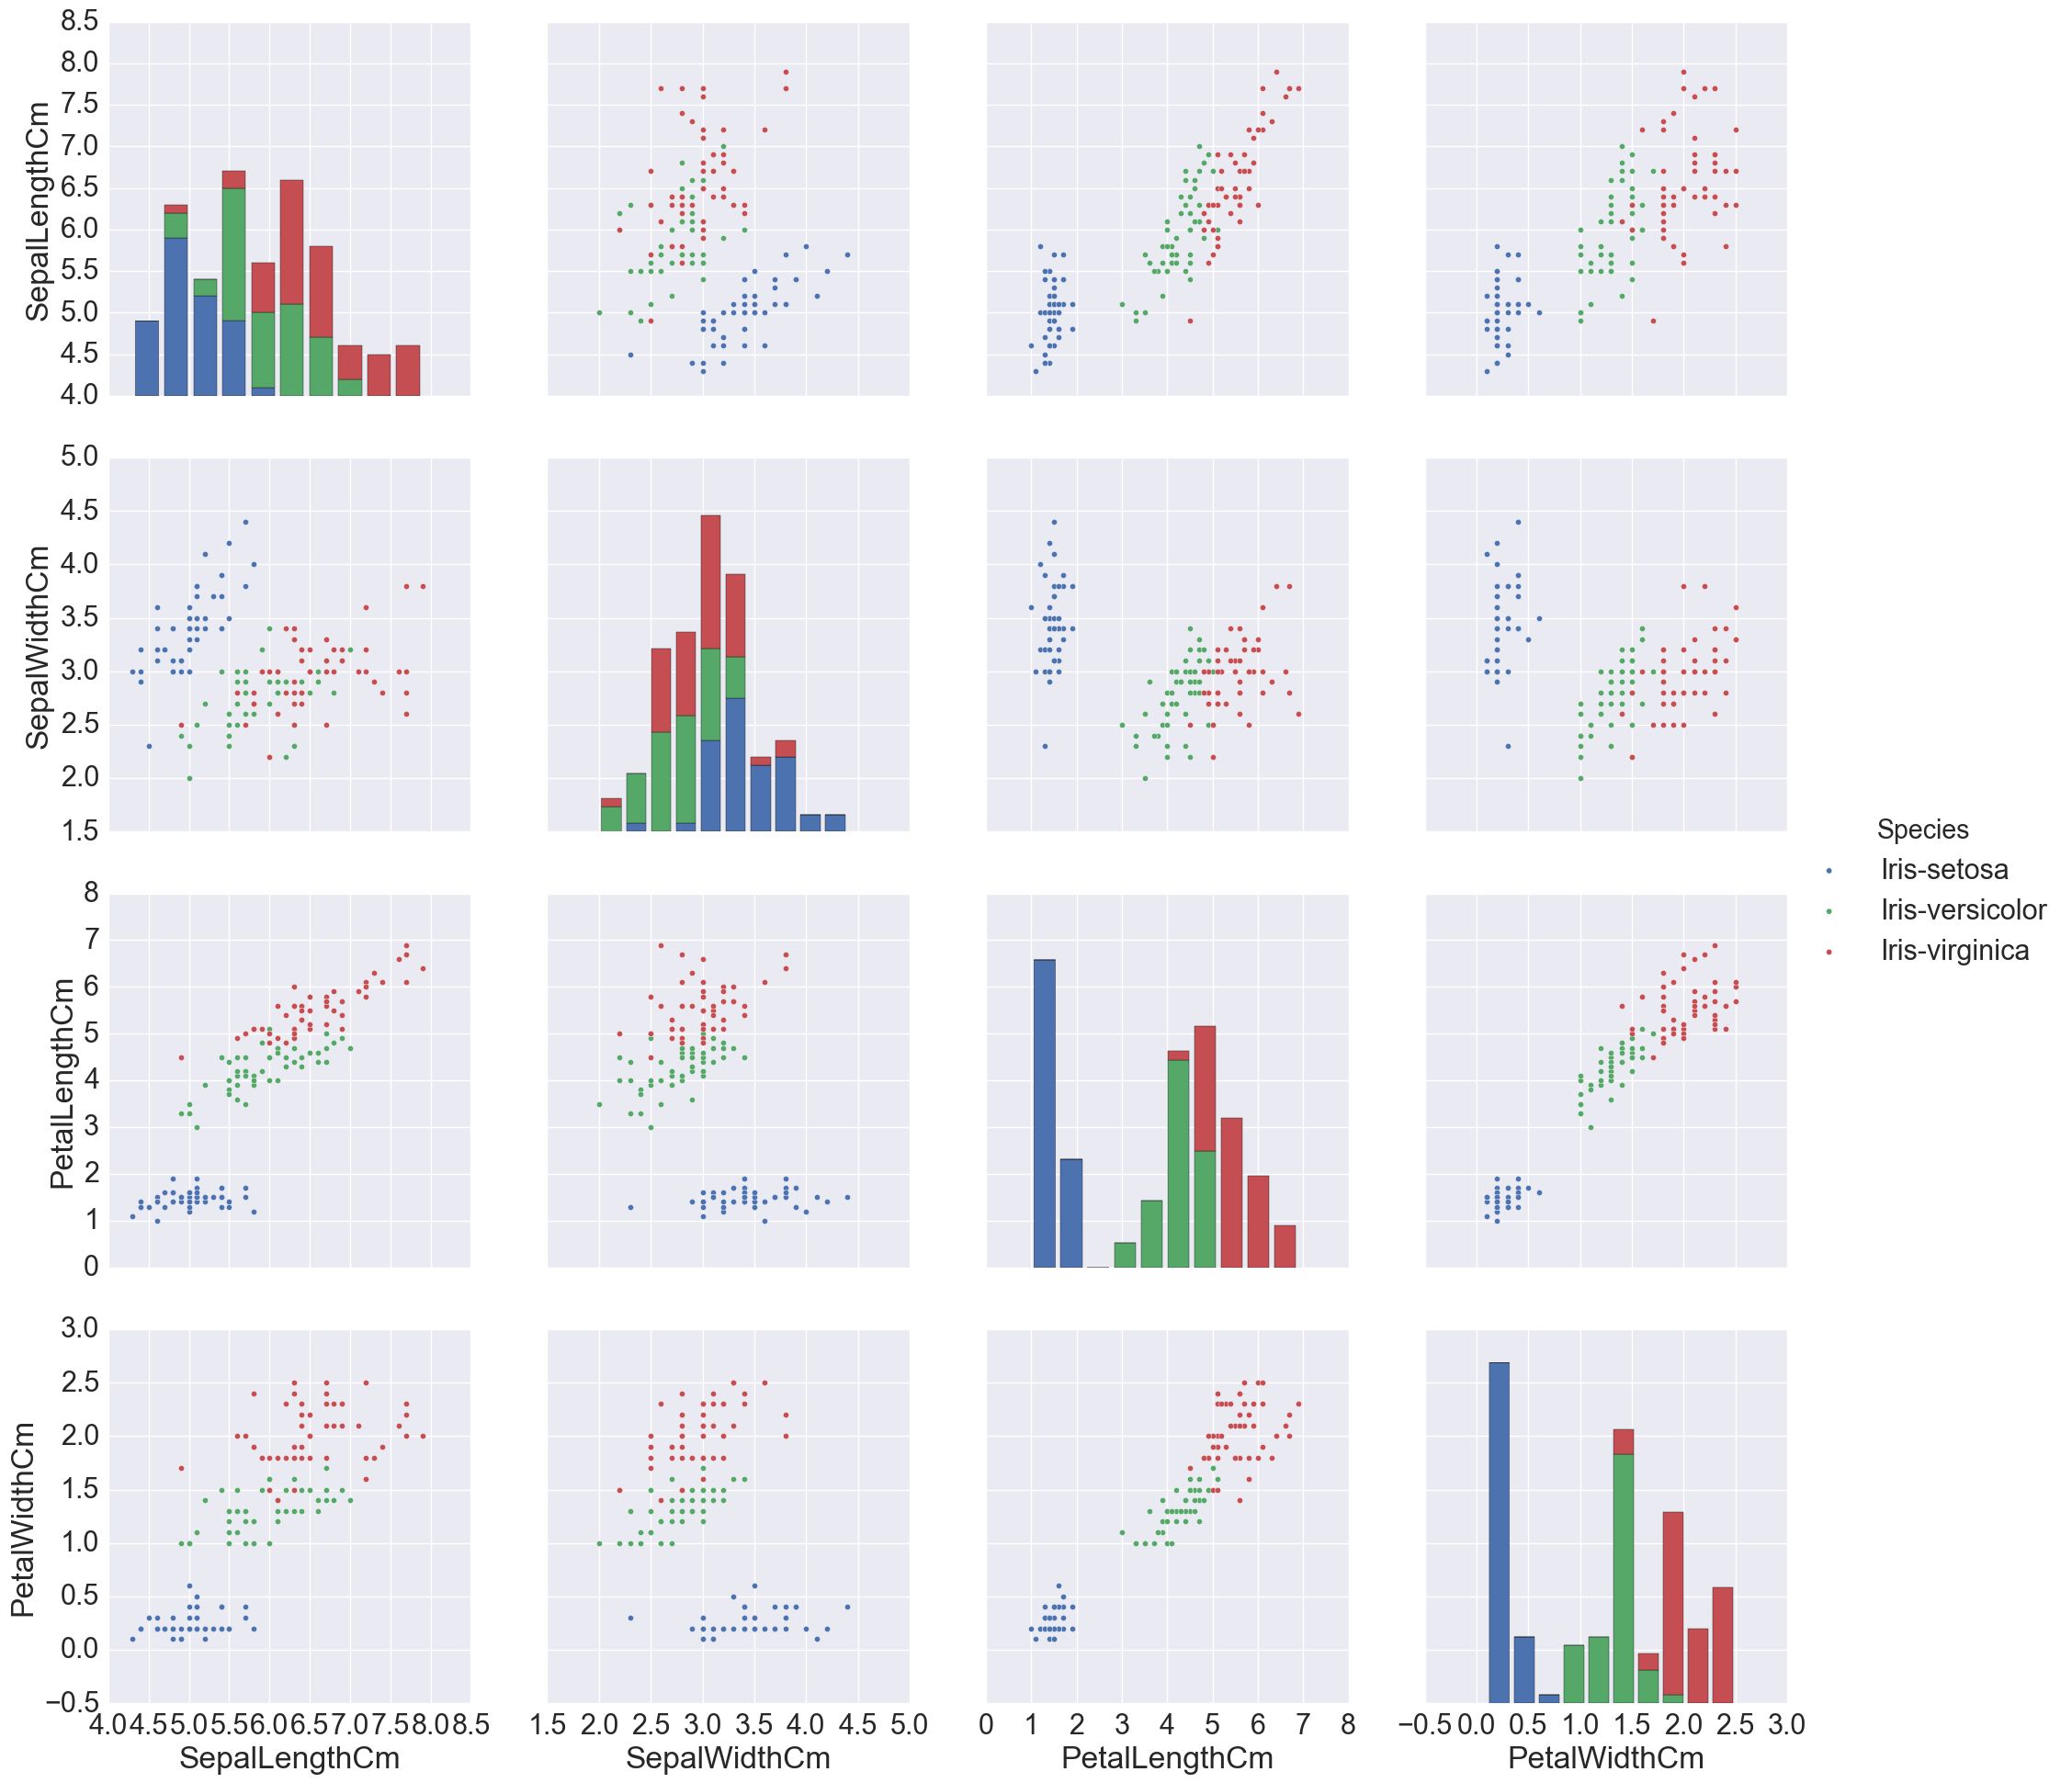

In [281]:
sns.pairplot(data_set.drop("Id", axis=1), hue="Species", size=5)


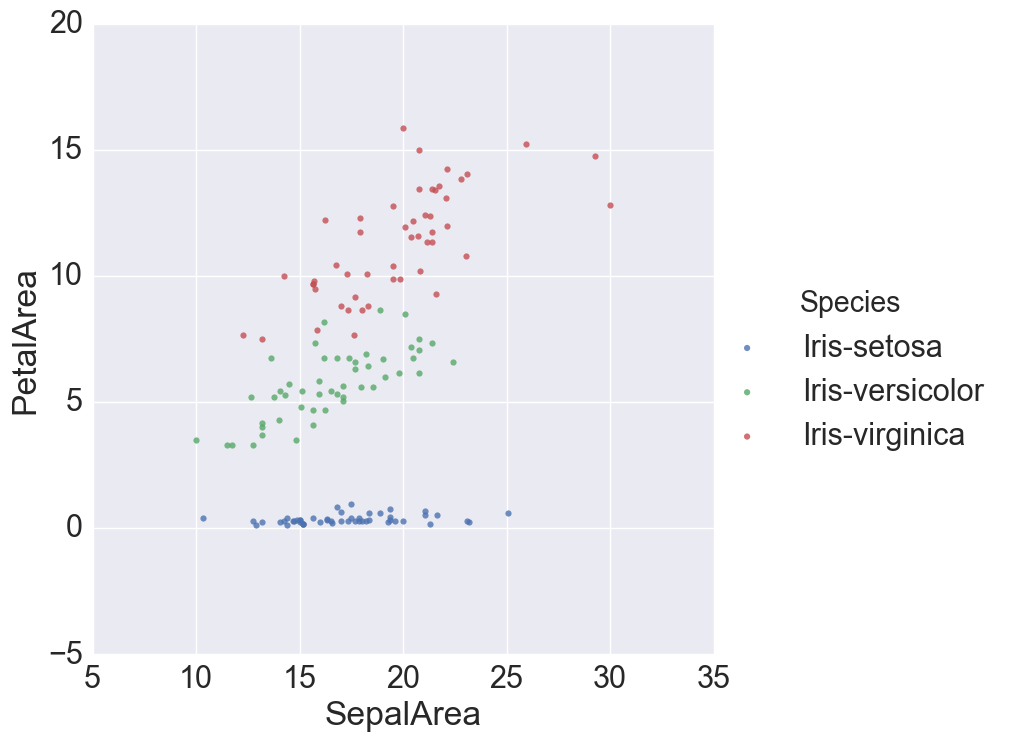

In [282]:
cols = data_set.columns
# X = data_set[cols[1:5]]
# X = X[[0,1]]
X = data_set[cols[0:5]]
y = data_set[cols[5]]

sepalArea = pd.Series(X.SepalLengthCm * X.SepalWidthCm, name='SepalArea')
petalArea = pd.Series(X.PetalLengthCm * X.PetalWidthCm, name='PetalArea')

encoded = pd.DataFrame([sepalArea, petalArea, y])
encoded = encoded.transpose()
X = encoded[[0,1]]
# sns.plt.scatter(encoded.SepalArea,encoded.PetalArea)
# sns.plt.

sns.lmplot('SepalArea', 'PetalArea',
           data=encoded,
           fit_reg=False,
            hue="Species",legend_out = True,
          size=8)



In [283]:

#split the data_set into training set and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predicts = logreg.predict(X_test)
print ("Accuracy for logregression %s" % metrics.accuracy_score(y_test, predicts))
print ("Score when cross-validation is used %s" % cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())


Accuracy for logregression 0.966666666667
Score when cross-validation is used 0.966666666667


In [284]:
def map_features(f1, f2, order=1):
    '''map the f1 and f2 to its higher order polynomial'''
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(f1, i - j) * np.power(f2, j)
    return np.vstack(iter())

def draw_boundary(classifier):
    dim = np.linspace(-1, 1.5, 1000)
    dx, dy = np.meshgrid(dim, dim)
    v = map_features(dx.flatten(), dy.flatten(), order=6)
    z = (np.dot(classifier.coef_,v) + classifier.intercept_).reshape(1000, 1000)
    CS = plt.contour(dx, dy, levels=[0], colors=['r'])

In [292]:
output_notebook()
w0 = logreg.intercept_
w1, w2 = logreg.coef_[0]

p = figure(height=450, width=450)
# class0 = encoded[encoded.Species == 'Iris-setosa'].as_matrix()
# class1 = encoded[encoded.Species == 'Iris-versicolor'].as_matrix()
# class2 = encoded[encoded.Species == 'Iris-virginica'].as_matrix()
# p.scatter(class0[:,0], class0[:,1], color="red", legend="Not Admitted")
# p.scatter(class1[:,0], class1[:,1], color = "blue", legend="Admitted")
# p.scatter(class2[:,0], class2[:,1], color = "green", legend="Admitted")

xxx = np.array([-3,0,3])
p.line(X, (-w0-w1*xxx)/w2)
 
show(p)


Loading BokehJS ...

(3, 2)